# Music Recommendation System

### Importing all the required libaries

In [84]:
# System libraries
import re
import unicodedata
import itertools

# File manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

# Machine learning
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configure visualization settings
sns.set_theme(style='whitegrid')
palette = 'viridis'

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Display Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Display library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions


Python version in this Jupyter Notebook: 3.6.8
seaborn    0.11.2
re         2.2.1
numpy      1.19.5
pandas     1.1.5
matplotlib 3.3.4
watermark  2.0.2
Library versions


### Reading the .csv file containing 1 million records and storing it in a dataframe

The dataset can be downloaded from the link - https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks?source=post_page-----5780cabfe194--------------------------------

In [85]:
df = pd.read_csv("spotify_data.csv")


### Displaying the data

In [86]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.48,0.30,4,-10.06,1,0.04,0.69,0.00,0.12,0.14,133.41,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.57,0.45,3,-10.29,1,0.03,0.48,0.00,0.10,0.52,140.18,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.41,0.23,3,-13.71,1,0.03,0.34,0.00,0.09,0.14,139.83,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.39,0.25,10,-9.85,1,0.04,0.81,0.00,0.08,0.51,204.96,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.43,0.79,6,-5.42,0,0.03,0.07,0.02,0.11,0.22,171.86,244320,4


In [87]:
df.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.37,0.74,10,-6.45,0,0.07,0.33,0.00,0.16,0.52,107.95,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.52,0.68,7,-7.59,0,0.03,0.79,0.00,0.13,0.26,119.90,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.49,0.44,5,-8.51,1,0.03,0.48,0.00,0.09,0.04,100.08,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.48,0.41,0,-13.34,1,0.03,0.43,0.00,0.12,0.20,133.88,239133,3
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.78,0.86,1,-7.29,0,0.12,0.22,0.00,0.06,0.86,89.99,212227,4


### Checking the datatype of the various columns

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

### Viewing the structure of the dataframe

In [89]:
df.shape

(1159764, 20)

### Checking for null values

In [90]:
print(df.isnull().sum())

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64


Since there are no null values, we do not have to perform any imputations

In [92]:
df = df_cleaned

### Dropping the 'Unnamed' column

In [93]:
df = df.drop(columns=['Unnamed: 0'])

### Transforming the alphanumeric values from track_id column with serial nos and performing Numerical Analysis - count, mean, standard deviation, min and max values

In [95]:
# Set pandas display options
pd.set_option('display.float_format', '{:.2f}'.format)

# Assuming `df` is your DataFrame
# Drop the 'track_id' column temporarily to exclude it from description
df_description = df.drop(columns=['track_id'], errors='ignore').describe()

# Display the DataFrame description
df_description

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00
mean,18.38,2011.96,0.54,0.64,5.29,-8.98,0.63,0.09,0.32,0.25,0.22,0.46,121.38,249561.78,3.89
std,15.89,6.80,0.18,0.27,3.56,5.68,0.48,0.13,0.35,0.37,0.20,0.27,29.78,149426.16,0.47
min,0.00,2000.00,0.00,0.00,0.00,-58.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2073.00,0.00
25%,5.00,2006.00,0.41,0.45,2.00,-10.83,0.00,0.04,0.01,0.00,0.10,0.23,98.80,181091.00,4.00
50%,15.00,2012.00,0.55,0.69,5.00,-7.45,1.00,0.05,0.15,0.00,0.13,0.44,121.93,225744.00,4.00
75%,29.00,2018.00,0.68,0.87,8.00,-5.28,1.00,0.09,0.64,0.61,0.29,0.67,139.90,286913.50,4.00
max,100.00,2023.00,0.99,1.00,11.00,6.17,1.00,0.97,1.00,1.00,1.00,1.00,249.99,6000495.00,5.00


### Visualizing the Numerical Analysis through Histogram

In [96]:
def plot_histograms(dataframe, bins=30, figsize=(20, 15), title="Distribution of Features"):
    # Select numerical columns excluding 'track_id'
    numerical_columns = dataframe.select_dtypes(include=['number']).drop(columns=['track_id'], errors='ignore')
    
    # Plot histograms for the selected columns
    numerical_columns.hist(bins=bins, figsize=figsize)
    plt.suptitle(title, fontsize=16)
    plt.show()

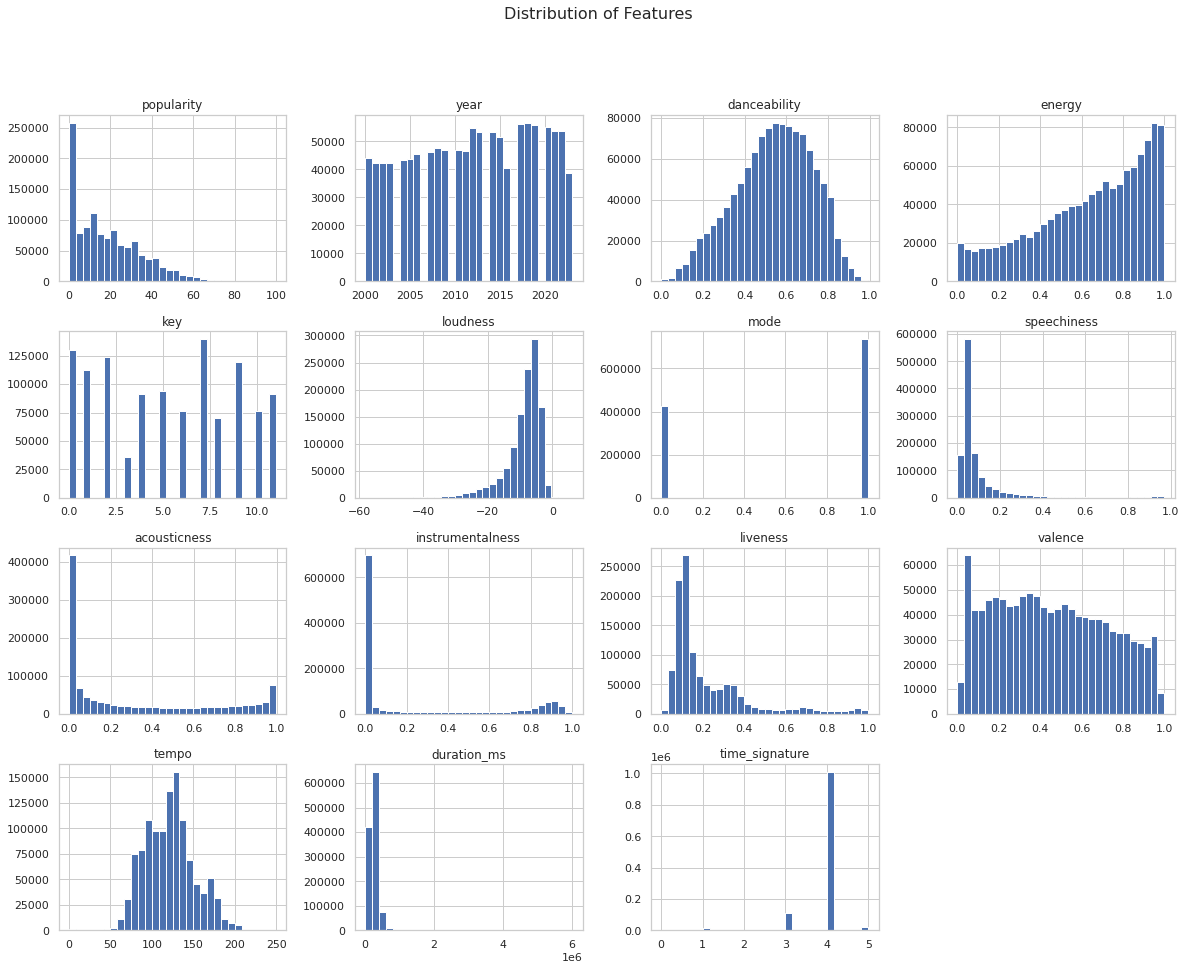

In [97]:
plot_histograms(df)

### Visualizing the Numerical Analysis through Boxplot

In [98]:
def plot_boxplots(dataframe, exclude_columns=None, figsize=(15, 10), layout=(4, 5)):
    # Select numeric columns
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64'])
    
    # Drop excluded columns if specified
    if exclude_columns:
        numeric_columns = numeric_columns.drop(columns=exclude_columns, errors='ignore')
    
    # Create box plots
    plt.figure(figsize=figsize)
    for i, column in enumerate(numeric_columns.columns):
        if i >= layout[0] * layout[1]:  # Ensure we don't exceed subplot layout
            break
        plt.subplot(layout[0], layout[1], i + 1)
        sns.boxplot(y=dataframe[column])
        plt.title(column)
    
    plt.tight_layout()
    plt.show()

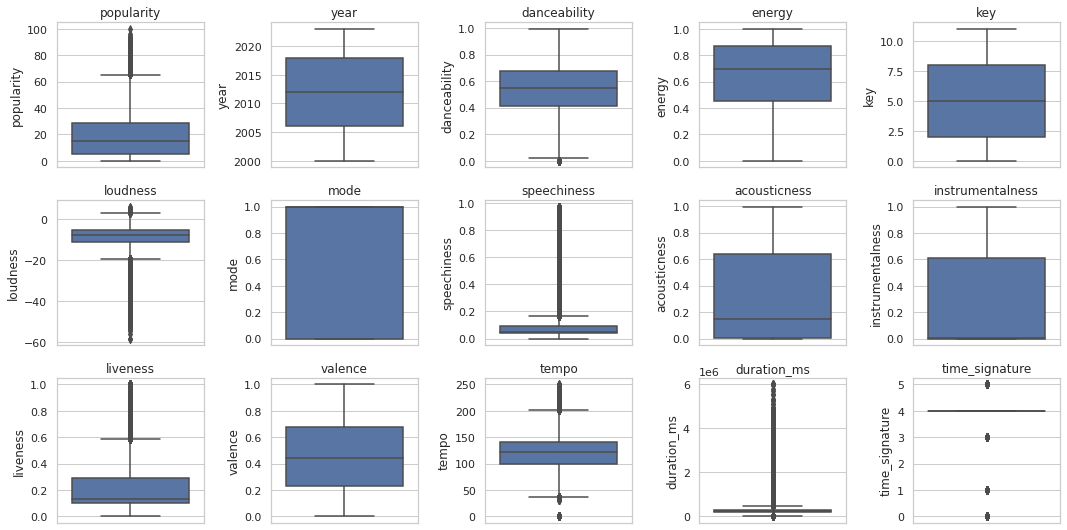

In [99]:
plot_boxplots(df, exclude_columns=['track_id'], figsize=(15, 10), layout=(4, 5))

### Density Plot for features - danceability, energy, valence

In [100]:
def plot_kde(dataframe, columns, figsize=(10, 6), alpha=0.7, title="Density Plot of Selected Features"):
    dataframe[columns].plot(kind='density', figsize=figsize, alpha=alpha)
    plt.title(title)
    plt.show()

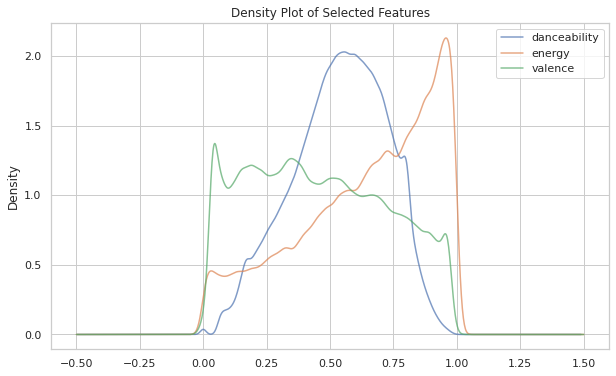

In [101]:
columns_to_plot = ['danceability', 'energy', 'valence']
plot_kde(df, columns_to_plot)

### Outlier Detection - Checking various techniques

#### 1. Winzorization Technique

In [102]:
def apply_winsorization(dataframe, numerical_features, lower_percentile=0.01, upper_percentile=0.99):
    # Calculate lower and upper bounds
    lower_bound = dataframe[numerical_features].quantile(lower_percentile)
    upper_bound = dataframe[numerical_features].quantile(upper_percentile)
    
    # Copy the dataframe to avoid modifying the original
    dataframe_winsorized = dataframe.copy()
    
    # Apply clipping to each numerical feature
    for column in numerical_features:
        dataframe_winsorized[column] = dataframe_winsorized[column].clip(
            lower=lower_bound[column], upper=upper_bound[column]
        )
    
    return dataframe_winsorized

In [103]:
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df_winsorized = apply_winsorization(df, numerical_features)

# Show the result
print(f"Original Shape: {df.shape}")
print(f"Winsorized Shape: {df_winsorized.shape}")

Original Shape: (1159764, 19)
Winsorized Shape: (1159764, 19)


We do not choose winsorization technique since it does not classify any of the samples as outliers

#### 2. Interquartile Range Technique

In [104]:
def remove_outliers_iqr(dataframe, exclude_columns=None):
    # Select numeric columns
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    if exclude_columns:
        numeric_cols = numeric_cols.drop(columns=exclude_columns)
    
    # Calculate Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define a mask for rows without outliers
    mask = ~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Apply the mask to the original dataframe
    dataframe_no_outliers = dataframe[mask]
    
    return dataframe_no_outliers

In [105]:
df_no_outliers_iqr = remove_outliers_iqr(df, exclude_columns=['track_id'])

# Check the result
print(f"Original Shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers_iqr.shape}")

Original Shape: (1159764, 19)
Shape after outlier removal: (749165, 19)


We do not choose this method since it removes nearly 35% of the data as outliers

#### 3. Zscore Technique

In [106]:
from scipy.stats import zscore
import numpy as np

def remove_outliers_zscore(dataframe, exclude_columns=None, threshold=3):
    # Select numeric columns
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    if exclude_columns:
        numeric_cols = numeric_cols.drop(columns=exclude_columns)
    
    # Calculate Z-scores
    z_scores = numeric_cols.apply(zscore)
    
    # Create a mask for rows without outliers
    mask = (np.abs(z_scores) < threshold).all(axis=1)
    
    # Apply the mask to the original dataframe
    dataframe_no_outliers = dataframe[mask]
    
    return dataframe_no_outliers

In [107]:
df_no_outliers_zscore = remove_outliers_zscore(df, exclude_columns=['track_id'], threshold=3)

# Check the result
print(f"Original Shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers_zscore.shape}")


Original Shape: (1159764, 19)
Shape after outlier removal: (1058508, 19)


We do not choose this technique since 9% of the data is removed as outliers

#### 4. K-Nearest Neighbour Technique 

In [108]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def remove_outliers_knn(dataframe, exclude_columns=None, k=5, percentile=95):
    # Select numeric columns
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    if exclude_columns:
        numeric_cols = numeric_cols.drop(columns=exclude_columns)
    
    # Fit K-Nearest Neighbors
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(numeric_cols)
    
    # Compute distances to k-nearest neighbors
    distances, indices = knn.kneighbors(numeric_cols)
    
    # Compute the average distance to k-nearest neighbors for each point
    avg_distances = distances.mean(axis=1)
    
    # Set threshold for outlier detection
    threshold = np.percentile(avg_distances, percentile)
    
    # Identify outliers
    outliers = avg_distances > threshold
    
    # Remove outliers
    dataframe_no_outliers = dataframe[~outliers]
    
    return dataframe_no_outliers

In [109]:
df_no_outliers_knn = remove_outliers_knn(df, exclude_columns=['track_id'], k=5, percentile=95)

# Check the result
print(f"Original Shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers_knn.shape}")


Original Shape: (1159764, 19)
Shape after outlier removal: (1101775, 19)


This method removes 5% of the data as outliers. So, we choose K Nearest Neighbour technique for Outlier Removal

#### Removing outliers using K Nearest Neighbours technique

In [110]:
df = df_no_outliers_knn

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101775 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1101775 non-null  object 
 1   track_name        1101775 non-null  object 
 2   track_id          1101775 non-null  int64  
 3   popularity        1101775 non-null  int64  
 4   year              1101775 non-null  int64  
 5   genre             1101775 non-null  object 
 6   danceability      1101775 non-null  float64
 7   energy            1101775 non-null  float64
 8   key               1101775 non-null  int64  
 9   loudness          1101775 non-null  float64
 10  mode              1101775 non-null  int64  
 11  speechiness       1101775 non-null  float64
 12  acousticness      1101775 non-null  float64
 13  instrumentalness  1101775 non-null  float64
 14  liveness          1101775 non-null  float64
 15  valence           1101775 non-null  float64
 16  

### Correlation Matrix - Finding the correlation between the numerical features in the dataset

In [112]:
def remove_highly_correlated_features(dataframe, exclude_columns=None, threshold=0.5, heatmap=False, figsize=(12, 8)):
    # Select numeric columns
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    if exclude_columns:
        numeric_cols = numeric_cols.drop(columns=exclude_columns)
    
    # Compute the correlation matrix
    correlation_matrix = numeric_cols.corr().abs()

    if heatmap:
        # Display correlation heatmap
        plt.figure(figsize=figsize)
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Heatmap for Numeric Features")
        plt.show()
    
    # Identify the upper triangle of the correlation matrix
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )

    # Find columns to drop
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop the identified columns
    reduced_dataframe = numeric_cols.drop(columns=to_drop)

    return reduced_dataframe, to_drop

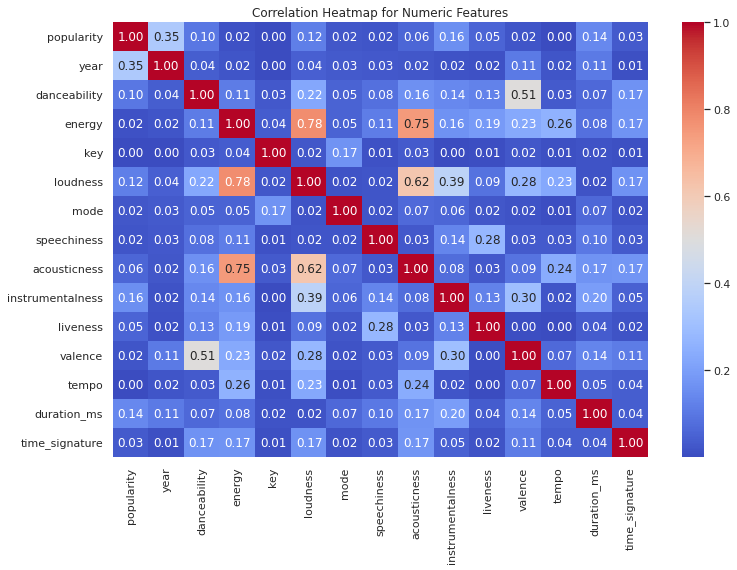

Columns that can be dropped due to high correlation: ['loudness', 'acousticness', 'valence']


In [113]:
numeric_columns_reduced, dropped_columns = remove_highly_correlated_features(
    df, exclude_columns=['track_id'], threshold=0.5, heatmap=True
)

# Display the dropped columns
print("Columns that can be dropped due to high correlation:", dropped_columns)

We can see that the following pairs have relatively high correlation values
- Loudness and Energy
- Acousticness and Energy
- Valence and Danceability
- Acousticness and Loudness

#### Removing columns - loudness and valence that are highly correlated to energy and danceability

In [114]:
df = df.drop(columns=['loudness','valence'])

In [115]:
df.shape

(1101775, 17)

### Analyzing the popularity trend over the years

In [116]:
def plot_popularity_trend(dataframe, year_column='year', popularity_column='popularity', figsize=(12, 6)):
    # Group the data by year and calculate the average popularity
    popularity_trend = dataframe.groupby(year_column)[popularity_column].mean().reset_index()
    
    # Plot the popularity trend
    plt.figure(figsize=figsize)
    plt.plot(popularity_trend[year_column], popularity_trend[popularity_column], marker='o', linestyle='-', color='blue')
    plt.title('Popularity Trend Over the Years', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Popularity', fontsize=12)
    plt.grid(alpha=0.3)
    plt.xticks(popularity_trend[year_column], rotation=45)
    plt.tight_layout()
    plt.show()

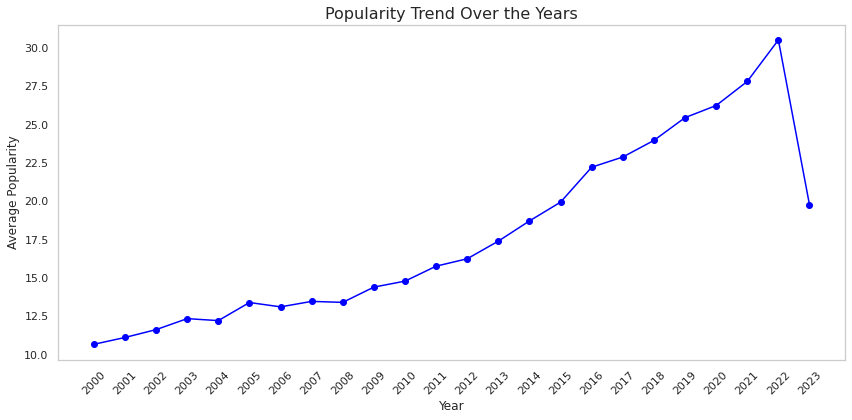

In [117]:
plot_popularity_trend(df, year_column='year', popularity_column='popularity')

The plot shows a gradual and steady increase in average popularity starting from 2000 to around 2021, highlighting a rising trend.
However, there is a significant **drop in popularity after 2021**, as seen by the sharp decline leading to 2023.
This suggests that while popularity grew consistently over the years, there might have been an event or shift in dynamics post-2021 that caused the decrease.

### Analyzing the downfall in the popularity trend from 2022 to 2023

#### Analyzing the top genres over the years

In [118]:
def calculate_yearly_genre_popularity(dataframe, year_column='year', genre_column='genre', popularity_column='popularity'):
    return dataframe.groupby([year_column, genre_column])[popularity_column].mean().reset_index()

In [119]:
def get_top_genres_each_year(yearly_genre_popularity, year_column='year', genre_column='genre', popularity_column='popularity', top_n=5):
    return (
        yearly_genre_popularity.sort_values([year_column, popularity_column], ascending=[True, False])
        .groupby(year_column)
        .head(top_n)
    )

### Summing the tracks released every year in these top genres

In [120]:
def count_tracks_by_genre_and_year(dataframe, top_genres, year_column='year', genre_column='genre'):
    # Filter data for only the top genres
    filtered_data = dataframe[dataframe[genre_column].isin(top_genres[genre_column])]
    
    # Group by year and genre and count tracks
    track_counts = filtered_data.groupby([year_column, genre_column]).size().reset_index(name='track_count')
    
    # Pivot the data for better readability
    track_counts_pivot = track_counts.pivot(index=genre_column, columns=year_column, values='track_count').fillna(0).astype(int)
    
    return track_counts_pivot

In [121]:
# Step 1: Calculate yearly genre popularity
yearly_genre_popularity = calculate_yearly_genre_popularity(df, year_column='year', genre_column='genre', popularity_column='popularity')

# Step 2: Find the top 5 genres for each year
top_genres_each_year = get_top_genres_each_year(yearly_genre_popularity, year_column='year', genre_column='genre', popularity_column='popularity', top_n=5)

# Step 3: Count the tracks for the top genres in each year
track_counts_pivot = count_tracks_by_genre_and_year(df, top_genres_each_year, year_column='year', genre_column='genre')

# Display the result
print(track_counts_pivot)

year       2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
genre                                                                  ...   
alt-rock    835   788   830   796   770   832   772   862   876   830  ...   
country     741   752   705   714   699   767   742   706   676   710  ...   
dance       803   758   687   777   685   660   697   702   702   619  ...   
electro     675   559   626   630   655   602   620   564   597   544  ...   
hip-hop     303   404   481   460   453   553   570   535   622   535  ...   
house       389   335   289   303   272   340   334   289   330   243  ...   
indie-pop   500   516   507   412   411   383   379   340   347   281  ...   
metal       114   116   134   145   140   151   203   216   218   225  ...   
pop         274   227   289   206   239   213   266   244   245   193  ...   
rock         76    76   122    62   113   121    93   124   127   116  ...   
sad           0     0     1     0     0     1     1    20    53 

### Visualizing the results using a heatmap

In [122]:
def plot_genre_track_counts_heatmap(dataframe, figsize=(12, 8), cmap="YlGnBu", title="Heatmap of Track Counts for Top Genres Over the Years"):
    plt.figure(figsize=figsize)
    sns.heatmap(dataframe, annot=True, fmt="d", cmap=cmap, linewidths=0.5)

    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.tight_layout()
    plt.show()

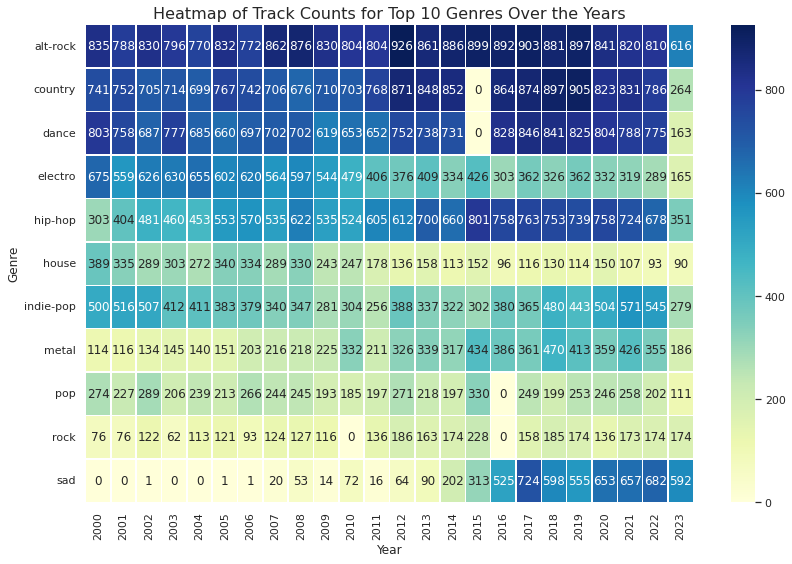

In [123]:
plot_genre_track_counts_heatmap(
    track_counts_pivot,
    figsize=(12, 8),
    cmap="YlGnBu",
    title="Heatmap of Track Counts for Top 10 Genres Over the Years"
)

The heatmap highlights the count of tracks released in the top five genres over the years. The noticeable decline in the number of songs released across these genres in 2022 and 2023 aligns with the observed drop in overall popularity. This suggests that reduced production or release activity in these genres significantly contributed to the decrease in popularity during this period.

### Analyzing the features over the years

In [124]:
def plot_feature_trend(dataframe, year_column, feature_column, title, xlabel='Year', ylabel=None, color='blue', figsize=(12, 6)):
    # Group by year and calculate the mean of the feature
    feature_trend = dataframe.groupby(year_column)[feature_column].mean()
    
    # Plot the trend
    feature_trend.plot(kind='line', figsize=figsize, marker='o', color=color, title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel if ylabel else feature_column)
    plt.grid()
    plt.show()

#### Tempo Analysis

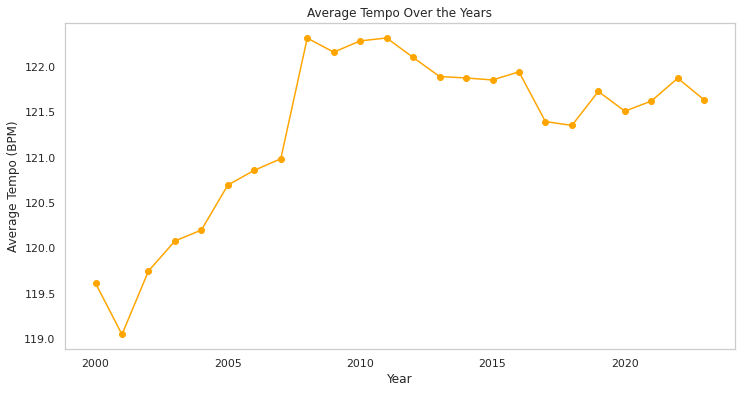

In [125]:
# Plot tempo trend
plot_feature_trend(
    dataframe=df, 
    year_column='year', 
    feature_column='tempo', 
    title='Average Tempo Over the Years', 
    ylabel='Average Tempo (BPM)', 
    color='orange'
)

This graph illustrates the average tempo of songs over the years, measured in beats per minute (BPM). Initially, there is a slight fluctuation in the tempo from 2000 to around 2005, followed by a sharp increase peaking in the mid-2000s. After this peak, the tempo stabilizes with minor variations, showing a consistent trend with small dips and rises from 2010 onwards. This suggests that while the average tempo of songs varied initially, it became more uniform in recent years.

#### Energy Analysis

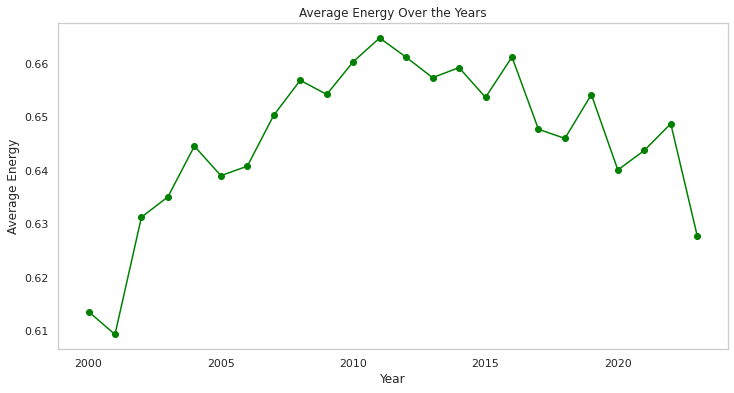

In [126]:
# Plot energy trend
plot_feature_trend(
    dataframe=df, 
    year_column='year', 
    feature_column='energy', 
    title='Average Energy Over the Years', 
    ylabel='Average Energy', 
    color='green'
)


The graph shows the trend of average energy values over the years from 2000 to 2023. It starts with a gradual increase until around 2010, followed by fluctuations and a decline toward the most recent years, with peak average energy observed around 2010.

#### Danceability and Acousticness Analysis

In [127]:
def plot_audio_feature_trends(dataframe, year_column, features, title='Trends for Audio Features Over the Years', xlabel='Year', ylabel='Average Feature Value', figsize=(12, 6)):
    # Group by year and calculate the mean of the specified features
    feature_trends = dataframe.groupby(year_column)[features].mean()
    
    # Plot trends for the features
    feature_trends.plot(figsize=figsize, marker='o', title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Audio Features')
    plt.grid()
    plt.show()


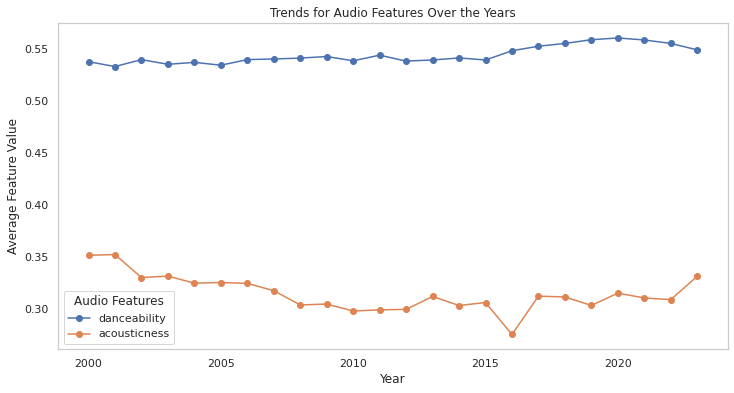

In [128]:
audio_features = ['danceability', 'acousticness']
plot_audio_feature_trends(
    dataframe=df,
    year_column='year',
    features=audio_features,
    title='Trends for Audio Features Over the Years',
    xlabel='Year',
    ylabel='Average Feature Value'
)

The graph illustrates the trends of two audio features, danceability and acousticness, over the years from 2000 to 2023. Danceability shows a steady and slightly increasing trend, whereas acousticness displays a gradual decline with occasional fluctuations, indicating contrasting behaviors in these audio features over time.

#### Duration Analysis

In [129]:
def plot_duration_trend(dataframe, year_column, duration_column, title='Average Song Duration Over the Years', xlabel='Year', ylabel='Average Duration (Minutes)', color='purple', figsize=(12, 6)):
    # Convert duration from milliseconds to minutes
    dataframe['duration_min'] = dataframe[duration_column] / 60000
    
    # Group by year and calculate the average duration
    duration_trend = dataframe.groupby(year_column)['duration_min'].mean()
    
    # Plot the trend
    duration_trend.plot(kind='line', figsize=figsize, marker='o', title=title, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()


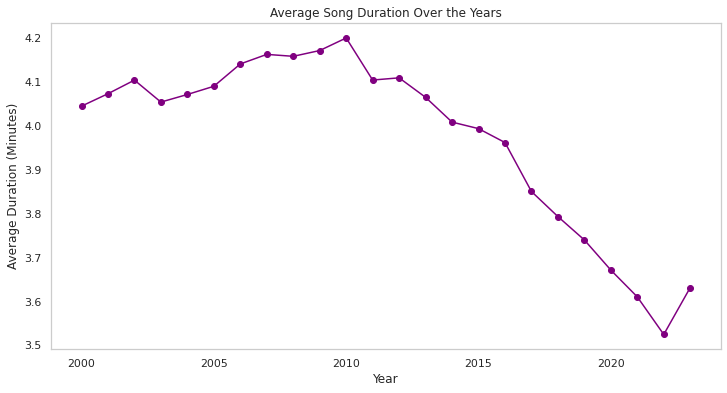

In [130]:
plot_duration_trend(
    dataframe=df,
    year_column='year',
    duration_column='duration_ms',
    title='Average Song Duration Over the Years',
    xlabel='Year',
    ylabel='Average Duration (Minutes)',
    color='purple'
)

The graph shows the trend of average song durations (in minutes) from 2000 to 2023. Song durations generally increased until around 2010, after which they started to decline steadily, reaching their lowest average around 2022, followed by a slight increase.

#### Speechiness and Instrumentalization

In [131]:
def plot_multiple_feature_trends(dataframe, year_column, feature_columns, title='Trends for Audio Features Over the Years', xlabel='Year', ylabel='Average Value', figsize=(12, 6)):
    # Group by year and calculate the mean for the specified features
    feature_trends = dataframe.groupby(year_column)[feature_columns].mean()
    
    # Plot trends for the features
    feature_trends.plot(figsize=figsize, marker='o', title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Audio Features')
    plt.grid()
    plt.show()

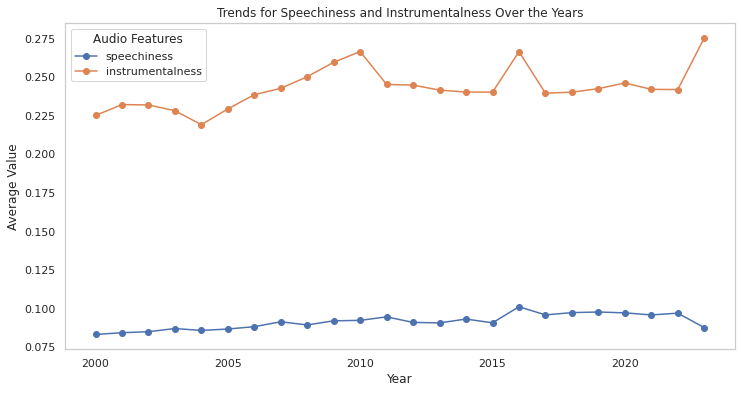

In [132]:
plot_multiple_feature_trends(
    dataframe=df,
    year_column='year',
    feature_columns=['speechiness', 'instrumentalness'],
    title='Trends for Speechiness and Instrumentalness Over the Years',
    xlabel='Year',
    ylabel='Average Value'
)

The graph displays trends for two audio features, speechiness and instrumentalness, over the years from 2000 to 2023. Instrumentalness shows an increasing trend until around 2010, after which it fluctuates and peaks again near 2023. Speechiness remains relatively stable, with minor variations throughout the years.

#### Time Signature Trends over the years

In [133]:
def plot_stacked_bar_distribution(dataframe, year_column, category_column, title='Trends Over the Years', xlabel='Year', ylabel='Count', figsize=(14, 8), colormap='Accent'):
    # Group by year and category, then count occurrences
    distribution = dataframe.groupby([year_column, category_column]).size().unstack()
    
    # Plot a stacked bar chart
    distribution.plot(kind='bar', stacked=True, figsize=figsize, colormap=colormap)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title=category_column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

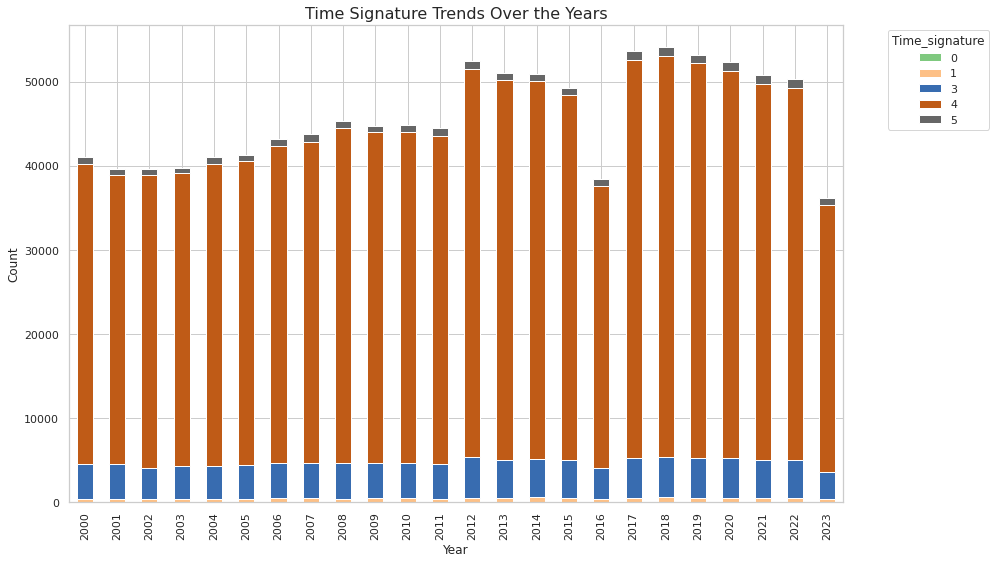

In [134]:
plot_stacked_bar_distribution(
    dataframe=df,
    year_column='year',
    category_column='time_signature',
    title='Time Signature Trends Over the Years',
    xlabel='Year',
    ylabel='Count',
    colormap='Accent'
)

The bar chart shows the distribution of time signatures over the years from 2000 to 2023. The majority of songs have a time signature of 4, dominating throughout the period, with smaller proportions for other time signatures like 3, 5, 1, and 0. The overall count of songs fluctuates slightly, peaking in some years and declining in others, especially in 2023.

#### Analyzing the top Artists

In [135]:
def find_top_artists_by_year(dataframe, year_column, artist_column, top_n=5):
    """
    Finds the top N artists for each year based on the number of tracks.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        year_column (str): Column name representing the year.
        artist_column (str): Column name representing the artist.
        top_n (int): Number of top artists to select for each year.

    Returns:
        pd.DataFrame: DataFrame with the top N artists and their track counts for each year.
    """
    top_artists = (
        dataframe.groupby([year_column, artist_column]).size()
        .reset_index(name='track_count')
        .sort_values([year_column, 'track_count'], ascending=[True, False])
        .groupby(year_column)
        .head(top_n)
    )
    return top_artists

In [136]:
def plot_top_artists(dataframe, year_column, artist_column, track_count_column, figsize=(30, 30), colormap='Set2'):
    # Pivot the data for visualization
    pivot_data = dataframe.pivot(index=artist_column, columns=year_column, values=track_count_column).fillna(0)
    
    # Plot the stacked bar chart
    pivot_data.plot(kind='barh', stacked=True, figsize=figsize, colormap=colormap)
    plt.title('Top Artists Contributing Tracks Over the Years', fontsize=16)
    plt.xlabel('Track Count', fontsize=12)
    plt.ylabel('Artist Name', fontsize=12)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

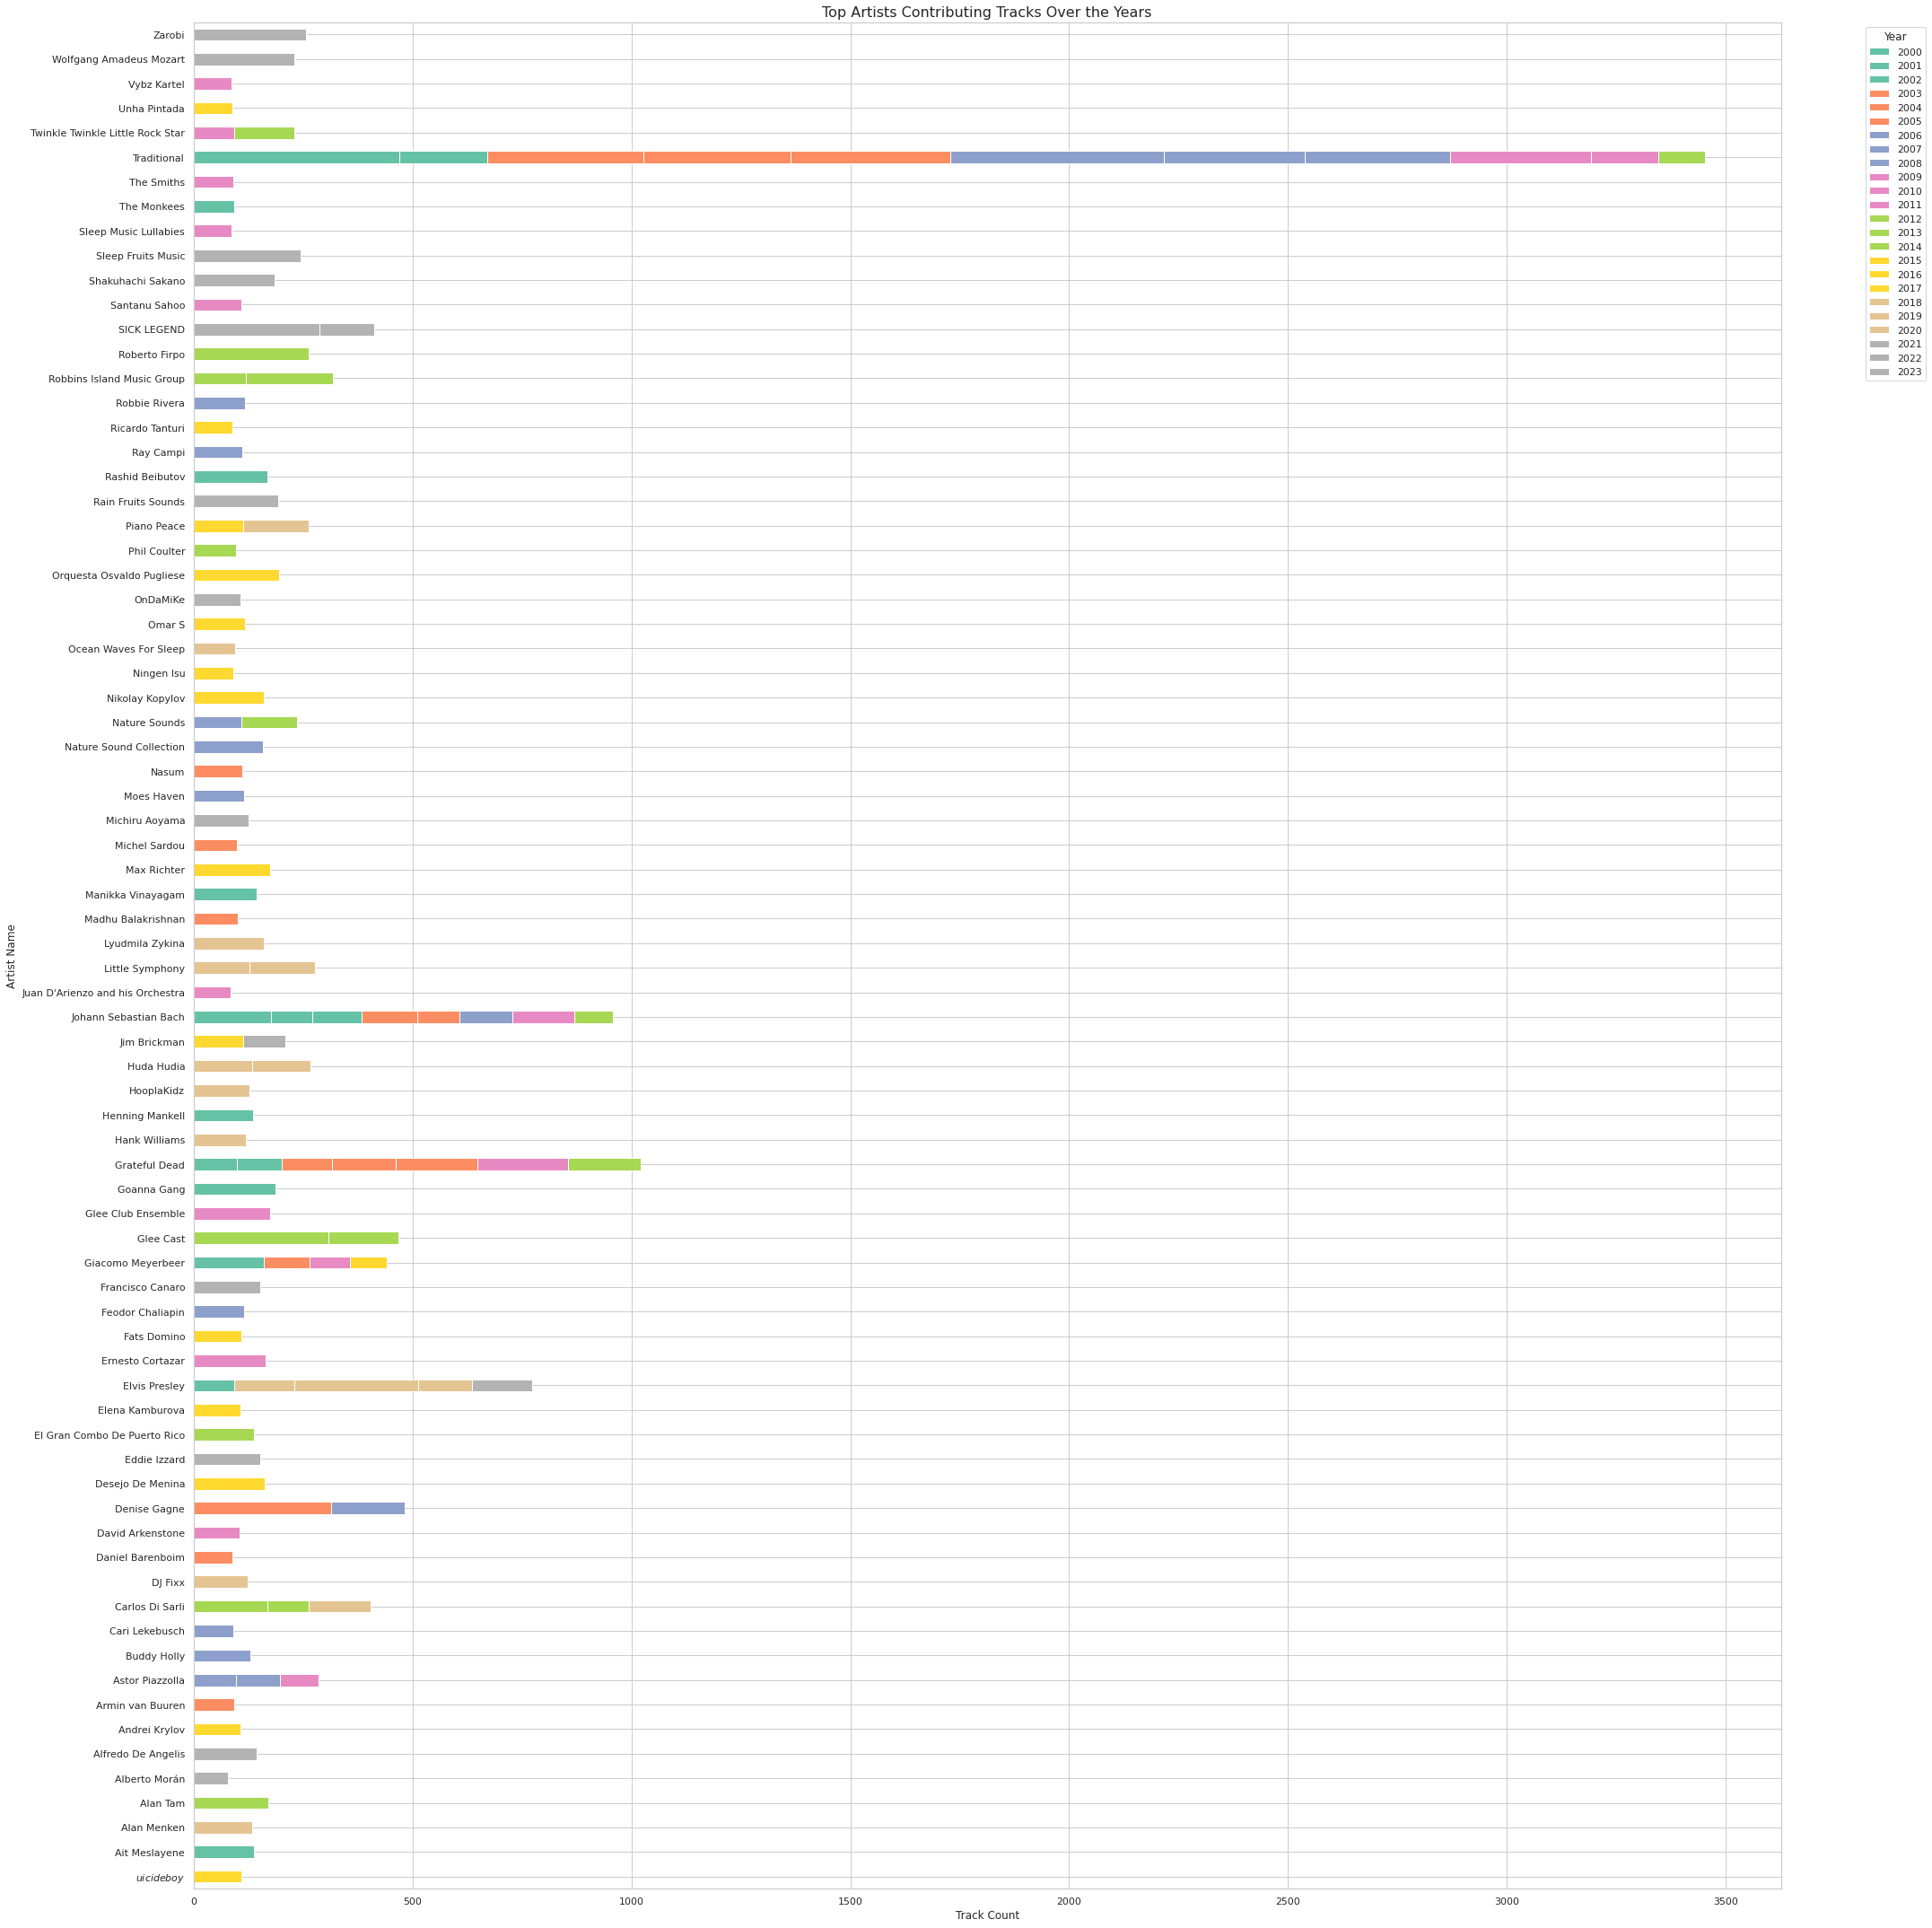

In [137]:
top_artists_by_year = find_top_artists_by_year(df, year_column='year', artist_column='artist_name', top_n=5)

plot_top_artists(
    dataframe=top_artists_by_year,
    year_column='year',
    artist_column='artist_name',
    track_count_column='track_count',
    figsize=(30, 30),
    colormap='Set2'
)

The chart provides a visual representation of the contributions made by top artists to track counts over several years. Each bar corresponds to a specific artist, and the length of the bar reflects the total number of tracks they contributed during that time. The bars are segmented and color-coded by year, allowing us to observe how an artist's activity fluctuated or remained consistent across different periods.4

**Key observations**:

**Dominant Artists**: One artist, likely represented by a very long and multi-colored bar, appears to contribute a significantly higher number of tracks compared to others. This suggests they were consistently active and productive over an extended period, releasing tracks in multiple consecutive years.

**Localized Contributions**: Some artists exhibit shorter bars or bars segmented by only one or two colors, indicating they were active only for specific years or had concentrated bursts of activity. These might represent artists with fewer tracks overall or those who were prominent only during certain time frames.

**Trends Over Time**: By examining the distribution of colors within the bars, we can identify periods of heightened or reduced productivity for certain artists. For example, some artists may have peaked in a particular decade or re-emerged after a period of inactivity.
This visualization offers insights into the output trends of various artists, their longevity, and periods of prominence, making it easier to identify both consistently influential artists and those with more sporadic or time-bound contributions.

#### Visualizing the popularity trends amongnst artists using heatmap

In [138]:
def plot_artist_popularity_heatmap(dataframe, title='Top Artists by Average Popularity Over the Years', xlabel='Year', ylabel='Artist Name', figsize=(14, 12), cmap='coolwarm'):
    plt.figure(figsize=figsize)
    sns.heatmap(dataframe, annot=True, fmt=".1f", cmap=cmap, linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

In [139]:
# Assuming 'df' is your main DataFrame and it contains 'year', 'artist_name', and 'popularity' columns
# Step 1: Group by 'year' and 'artist_name' to calculate average popularity
artist_popularity = (
    df.groupby(['year', 'artist_name'])['popularity']
    .mean()
    .reset_index()
)

# Step 2: For each year, get the artist with the highest average popularity
top_artist_per_year = (
    artist_popularity.loc[artist_popularity.groupby('year')['popularity'].idxmax()]
)

# Step 3: Pivot the table to get years as columns and artists as rows
top_artist_pivot = top_artist_per_year.pivot(
    index='artist_name', columns='year', values='popularity'
).fillna(0)

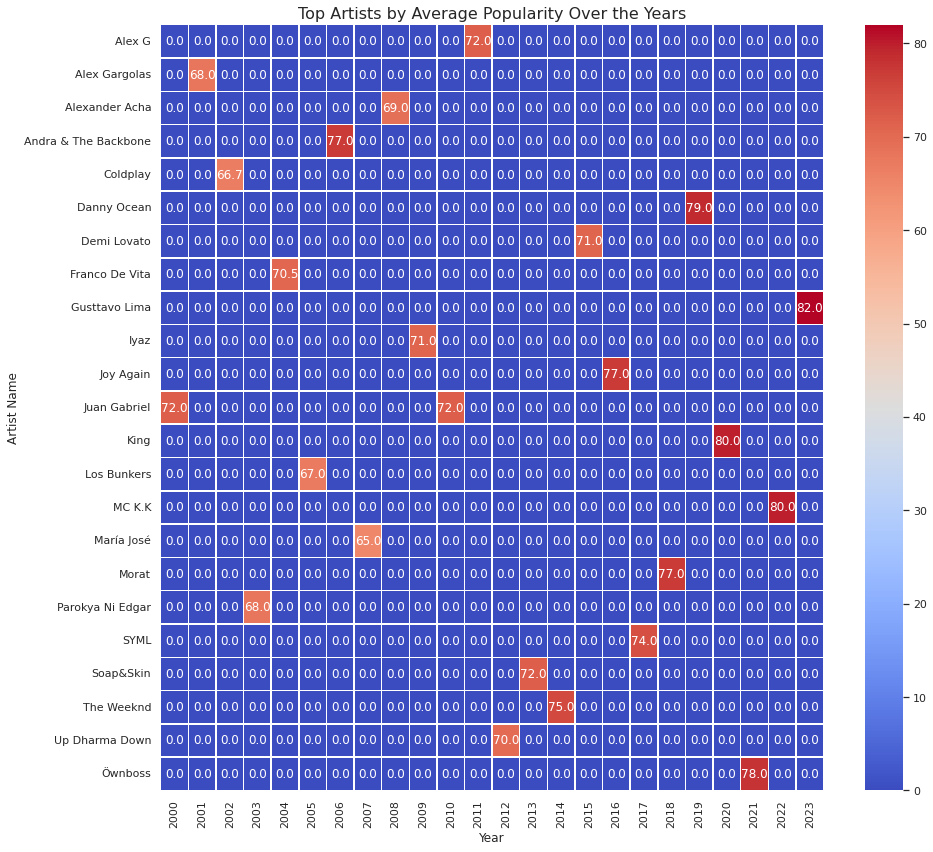

In [140]:
plot_artist_popularity_heatmap(
    dataframe=top_artist_pivot,
    title='Top Artists by Average Popularity Over the Years',
    xlabel='Year',
    ylabel='Artist Name',
    figsize=(14, 12),
    cmap='coolwarm'
)

The heatmap shows the average popularity of top artists over the years. This shows how popularity values of top artists have varied over the years.

### Identifying the top 10 genres based on track count

In [141]:
def plot_top_genres(dataframe, genre_column='genre', top_n=10, figsize=(12, 8), palette='viridis'):
    # Calculate top genres by track count
    top_genres = dataframe[genre_column].value_counts().head(top_n)
    
    # Create a barplot
    plt.figure(figsize=figsize)
    sns.barplot(y=top_genres.index, x=top_genres.values, palette=palette)
    plt.title(f'Top {top_n} Genres by Track Count', fontsize=16)
    plt.xlabel('Track Count', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.tight_layout()
    plt.show()

Unique Artists: 63261
Unique Genres: 82


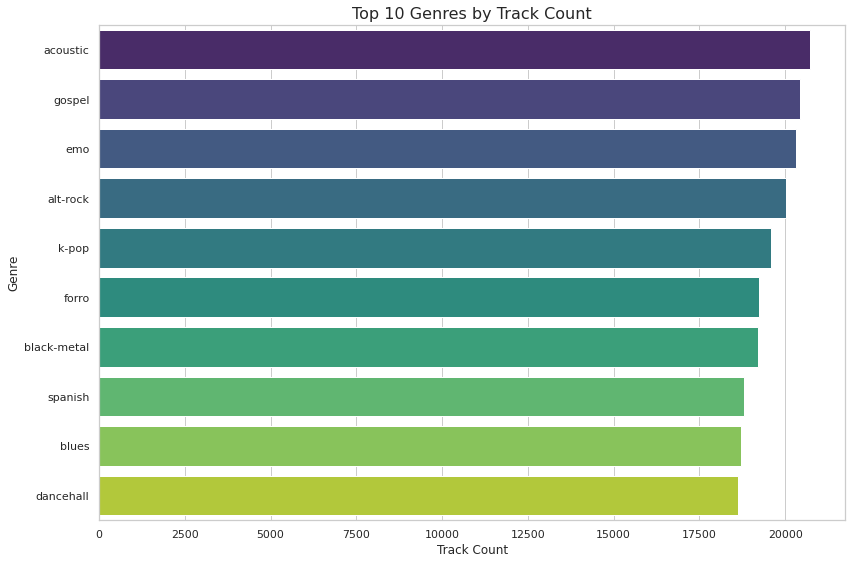

In [142]:
print("Unique Artists:", df['artist_name'].nunique())
print("Unique Genres:", df['genre'].nunique())

plot_top_genres(dataframe=df, genre_column='genre', top_n=10, figsize=(12, 8), palette='viridis')

The bar chart displays the top 10 music genres ranked by track count. Each bar represents a genre, and its length corresponds to the number of tracks within that genre. Key insights include:
Top Genres: Dancehall, blues, and Spanish appear among the most prominent genres, each with a high track count, indicating their strong presence in the dataset.
Distribution: The track counts are relatively close among the genres, showing a balanced popularity for these top genres rather than dominance by a single one.
Diverse Representation: The chart highlights a mix of cultural and stylistic genres, such as k-pop, gospel, and black-metal, reflecting a wide variety of musical preferences.
This visualization provides a clear overview of the most popular genres based on track production, showcasing their relative prevalence.

In [143]:
print(df.head())

     artist_name        track_name  track_id  popularity  year     genre  \
0     Jason Mraz   I Won't Give Up         0          68  2012  acoustic   
1     Jason Mraz  93 Million Miles         1          50  2012  acoustic   
2  Joshua Hyslop  Do Not Let Me Go         2          57  2012  acoustic   
4   Andrew Belle  Sky's Still Blue         4          54  2012  acoustic   
5  Chris Smither     What They Say         5          48  2012  acoustic   

   danceability  energy  key  mode  speechiness  acousticness  \
0          0.48    0.30    4     1         0.04          0.69   
1          0.57    0.45    3     1         0.03          0.48   
2          0.41    0.23    3     1         0.03          0.34   
4          0.43    0.79    6     0         0.03          0.07   
5          0.57    0.57    2     1         0.03          0.69   

   instrumentalness  liveness  tempo  duration_ms  time_signature  \
0              0.00      0.12 133.41       240166               3   
1             

# Standardizing the numerical columns

In [144]:
def standardize_features(dataframe, columns_to_standardize):
    scaler = StandardScaler()
    
    # Standardize the selected numerical features
    dataframe[columns_to_standardize] = scaler.fit_transform(dataframe[columns_to_standardize])
    
    return dataframe

In [145]:
numerical_columns = ['popularity', 'danceability', 'energy', 'speechiness',
                     'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']

df_standardized = standardize_features(df, numerical_columns)

# Display the first few rows of the standardized DataFrame
print(df_standardized.head())


     artist_name        track_name  track_id  popularity  year     genre  \
0     Jason Mraz   I Won't Give Up         0        3.19  2012  acoustic   
1     Jason Mraz  93 Million Miles         1        2.04  2012  acoustic   
2  Joshua Hyslop  Do Not Let Me Go         2        2.49  2012  acoustic   
4   Andrew Belle  Sky's Still Blue         4        2.29  2012  acoustic   
5  Chris Smither     What They Say         5        1.91  2012  acoustic   

   danceability  energy  key  mode  speechiness  acousticness  \
0         -0.34   -1.29    4     1        -0.39          0.69   
1          0.15   -0.73    3     1        -0.53          0.48   
2         -0.75   -1.55    3     1        -0.48          0.34   
4         -0.63    0.54    6     0        -0.50          0.07   
5          0.12   -0.29    2     1        -0.47          0.69   

   instrumentalness  liveness  tempo  duration_ms  time_signature  \
0             -0.67     -0.54   0.42         0.03           -2.01   
1             

### Counting the unique genres

In [146]:
# Check number of unique genres
unique_genres = df['genre'].unique()
print("Number of unique genres:", len(unique_genres))
print("Unique genres:", unique_genres)


Number of unique genres: 82
Unique genres: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


### Using k-means clustering in order to cluster similar genres based on numerical features

In [147]:
numerical_features = ['danceability', 'energy', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'tempo', 'duration_ms']

In [148]:
def perform_genre_clustering(dataframe, numerical_features, genre_column='genre', n_clusters=10, random_state=42):
    # Step 1: Select rows of the DataFrame corresponding to unique genres
    unique_genre_data = dataframe[[genre_column] + numerical_features].drop_duplicates(subset=genre_column)

    # Step 2: Standardize the numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(unique_genre_data[numerical_features])

    # Step 3: Apply K-Means clustering on unique genres
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    unique_genre_data['cluster'] = kmeans.fit_predict(scaled_data)

    # Step 4: Merge the cluster labels back to the original DataFrame
    dataframe = dataframe.merge(unique_genre_data[[genre_column, 'cluster']], on=genre_column, how='left')

    # Step 5: Create a new genre column based on clusters
    dataframe['new_genre'] = 'Cluster_' + dataframe['cluster'].astype(str)
    
    return dataframe, unique_genre_data


### Performing One-hot encoding for the broader genre categories 

In [150]:
def one_hot_encode_column(dataframe, column_to_encode):
    return pd.get_dummies(dataframe, columns=[column_to_encode])

In [151]:
# Perform clustering
df_clustered, unique_genre_data = perform_genre_clustering(
    dataframe=df, 
    numerical_features=numerical_features, 
    genre_column='genre', 
    n_clusters=10
)

# Group genres by cluster and count occurrences
cluster_genre_summary = unique_genre_data.groupby('cluster')['genre'].apply(list)

# Display genres in each cluster
for cluster, genres in cluster_genre_summary.items():
    print(f"Cluster {cluster}: {genres}")


Cluster 0: ['acoustic', 'ambient', 'cantopop', 'german', 'guitar', 'jazz', 'opera', 'piano', 'rock-n-roll', 'romance', 'show-tunes', 'songwriter', 'soul', 'tango']
Cluster 1: ['dance', 'death-metal', 'dub', 'funk', 'house', 'indie-pop', 'k-pop', 'pop-film', 'sad', 'techno']
Cluster 2: ['alt-rock', 'black-metal', 'breakbeat', 'electro', 'emo', 'gospel', 'groove', 'hardcore', 'hardstyle', 'metal', 'metalcore', 'minimal-techno', 'party', 'progressive-house', 'punk-rock', 'spanish', 'trance']
Cluster 3: ['comedy']
Cluster 4: ['forro', 'sertanejo', 'trip-hop']
Cluster 5: ['classical', 'new-age', 'sleep']
Cluster 6: ['afrobeat', 'chicago-house', 'chill', 'deep-house', 'detroit-techno', 'dubstep', 'electronic', 'punk']
Cluster 7: ['blues', 'club', 'dancehall', 'disco', 'folk', 'french', 'hip-hop', 'indian', 'pop', 'rock', 'salsa', 'samba', 'singer-songwriter']
Cluster 8: ['goth', 'grindcore', 'hard-rock', 'heavy-metal', 'power-pop']
Cluster 9: ['country', 'drum-and-bass', 'edm', 'garage', 'in

In [152]:
df_clustered, _ = perform_genre_clustering(
    dataframe=df, 
    numerical_features=numerical_features, 
    genre_column='genre', 
    n_clusters=10
)

#### Giving appropriate names for the clusters

In [153]:
cluster_names = {
    0: "Pop & Dance",
    1: "Rock & Underground",
    2: "Melodic & Vocal",
    3: "Electronic Vibes",
    4: "Timeless Classics",
    5: "Heavy Energy",
    6: "Humor",
    7: "Calm & Relax",
    8: "Party Anthems",
    9: "World Rhythms",
}

# Map cluster names
df_clustered['cluster_name'] = df_clustered['cluster'].map(cluster_names)

#### Dropping duplicate columns

In [154]:
print(df_clustered[['cluster', 'cluster_name']].drop_duplicates().sort_values(by='cluster'))

       cluster        cluster_name
0            0         Pop & Dance
11361        1  Rock & Underground
1735         2     Melodic & Vocal
9605         3    Electronic Vibes
20450        4   Timeless Classics
8080         5        Heavy Energy
960          6               Humor
4341         7        Calm & Relax
25091        8       Party Anthems
10490        9       World Rhythms


In [155]:
df_clustered.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,mode,...,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature,duration_min,cluster,new_genre,cluster_name
0,Jason Mraz,I Won't Give Up,0,3.19,2012,acoustic,-0.34,-1.29,4,1,...,0.69,-0.67,-0.54,0.42,0.03,-2.01,4.00,0,Cluster_0,Pop & Dance
1,Jason Mraz,93 Million Miles,1,2.04,2012,acoustic,0.15,-0.73,3,1,...,0.48,-0.67,-0.62,0.66,-0.24,0.24,3.61,0,Cluster_0,Pop & Dance
2,Joshua Hyslop,Do Not Let Me Go,2,2.49,2012,acoustic,-0.75,-1.55,3,1,...,0.34,-0.67,-0.66,0.65,-0.87,0.24,2.65,0,Cluster_0,Pop & Dance
3,Andrew Belle,Sky's Still Blue,4,2.29,2012,acoustic,-0.63,0.54,6,0,...,0.07,-0.62,-0.56,1.76,0.07,0.24,4.07,0,Cluster_0,Pop & Dance
4,Chris Smither,What They Say,5,1.91,2012,acoustic,0.12,-0.29,2,1,...,0.69,-0.67,-0.64,-1.33,-0.79,0.24,2.77,0,Cluster_0,Pop & Dance


### Performing one hot encoding on the clusters

In [156]:
def one_hot_encode_column(dataframe, column_to_encode, drop_first=False):
    # Apply one-hot encoding
    encoded_df = pd.get_dummies(dataframe, columns=[column_to_encode], drop_first=drop_first)
    
    # Ensure encoded values are binary (0 and 1)
    encoded_df = encoded_df * 1
    
    return encoded_df


In [157]:
# Perform one-hot encoding on the 'cluster_name' column
df_encoded = one_hot_encode_column(df_clustered, column_to_encode='cluster_name', drop_first=False)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


     artist_name        track_name  track_id  popularity  year     genre  \
0     Jason Mraz   I Won't Give Up         0        3.19  2012  acoustic   
1     Jason Mraz  93 Million Miles         1        2.04  2012  acoustic   
2  Joshua Hyslop  Do Not Let Me Go         2        2.49  2012  acoustic   
3   Andrew Belle  Sky's Still Blue         4        2.29  2012  acoustic   
4  Chris Smither     What They Say         5        1.91  2012  acoustic   

   danceability  energy  key  mode  ...  cluster_name_Calm & Relax  \
0         -0.34   -1.29    4     1  ...                          0   
1          0.15   -0.73    3     1  ...                          0   
2         -0.75   -1.55    3     1  ...                          0   
3         -0.63    0.54    6     0  ...                          0   
4          0.12   -0.29    2     1  ...                          0   

   cluster_name_Electronic Vibes  cluster_name_Heavy Energy  \
0                              0                          0

### Finding similar tracks across clusters based on audio features using cosine similarity

In [158]:
def find_similar_tracks_across_clusters(dataframe, target_track_index, feature_columns, cluster_column='cluster', top_n=10):
    # Step 1: Extract target track features
    target_track_features = dataframe.loc[target_track_index, feature_columns].values.reshape(1, -1)
    
    # Step 2: Initialize a list to store results
    all_recommendations = []
    
    # Step 3: Iterate through each cluster and compute similarity
    clusters = dataframe[cluster_column].unique()
    for cluster in clusters:
        # Filter tracks from the current cluster
        cluster_tracks = dataframe[dataframe[cluster_column] == cluster]
        feature_matrix = cluster_tracks[feature_columns].values
        
        # Compute cosine similarity
        similarity_matrix = cosine_similarity(target_track_features, feature_matrix)
        
        # Add similarity scores to the cluster DataFrame
        cluster_tracks = cluster_tracks.copy()
        cluster_tracks['similarity'] = similarity_matrix[0]
        
        # Append the results
        all_recommendations.append(cluster_tracks)
    
    # Step 4: Concatenate results and sort by similarity
    all_recommendations_df = pd.concat(all_recommendations)
    all_recommendations_df = all_recommendations_df.sort_values(by='similarity', ascending=False)
    
    # Step 5: Exclude the target track itself
    all_recommendations_df = all_recommendations_df[all_recommendations_df.index != target_track_index]
    
    # Step 6: Select top N similar tracks
    top_recommended_tracks = all_recommendations_df.head(top_n)
    
    # Return the recommended tracks with relevant details
    return top_recommended_tracks


In [159]:
feature_columns = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
target_track_index = 100  # Replace with the index of your target track

top_recommended_tracks = find_similar_tracks_across_clusters(
    dataframe=df_clustered,
    target_track_index=target_track_index,
    feature_columns=feature_columns,
    cluster_column='cluster',
    top_n=10
)

# Display the recommended tracks
print(top_recommended_tracks)

           artist_name        track_name  track_id  popularity  year  \
747734        Toquinho         Distância    787978       -1.17  2003   
772653      Hazy Loper  Black Sea Shanty    814287       -1.17  2004   
296393        Dan Berk        No Brainer    309790        0.69  2018   
1010523     Arvingarna    Bara femton år   1064480       -0.08  2009   
261832     Wild Rivers     Moving Target    273614        1.46  2017   
816650          Spoken   From the Inside    860871       -0.72  2005   
290176             徐秉龙                千禧    303187        0.18  2017   
966531   Carlos Roldán               Uno   1018444       -1.17  2008   
435117   Maggie Rogers     Resonant Body    455169        1.46  2020   
376245        HELLYEAH    Skyy and Water    393390        0.18  2019   

                     genre  danceability  energy  key  mode  ...  \
747734               samba         -0.17   -0.87    7     1  ...   
772653                goth         -0.15   -0.84    5     0  ...   
296

### Plotting a comparison of Target Track vs Recommended Track

In [160]:
def plot_audio_feature_comparison(target_features, recommended_features, audio_features, title='Audio Feature Comparison'):
    # Normalize features for visualization
    max_values = np.max([target_features, recommended_features], axis=0)
    target_features_normalized = target_features / max_values
    recommended_features_normalized = recommended_features / max_values

    # Prepare data for radar chart
    angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
    target_features_normalized = np.concatenate((target_features_normalized, [target_features_normalized[0]]))
    recommended_features_normalized = np.concatenate((recommended_features_normalized, [recommended_features_normalized[0]]))
    angles += angles[:1]

    # Plot radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, target_features_normalized, color='blue', alpha=0.25, label='Target Track')
    ax.fill(angles, recommended_features_normalized, color='red', alpha=0.25, label='Recommended Tracks')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features, fontsize=10)
    ax.legend(loc='upper right', fontsize=10)
    plt.title(title, fontsize=14)
    plt.show()

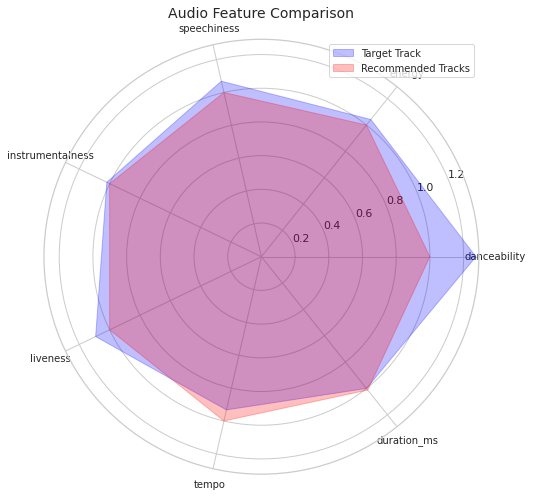

In [161]:
# Define audio features
audio_features = feature_columns

# Extract target features and average recommended features
target_features = df_clustered.loc[target_track_index, audio_features].values
recommended_features = top_recommended_tracks[audio_features].mean().values

# Plot audio feature comparison
plot_audio_feature_comparison(
    target_features=target_features,
    recommended_features=recommended_features,
    audio_features=audio_features,
    title='Audio Feature Comparison'
)

In [169]:
target_track_index = 40567  # Replace with the index of your target track

top_recommended_tracks = find_similar_tracks_across_clusters(
    dataframe=df_clustered,
    target_track_index=target_track_index,
    feature_columns=feature_columns,
    cluster_column='cluster',
    top_n=10
)

# Display the recommended tracks
print(top_recommended_tracks)

              artist_name                   track_name  track_id  popularity  \
888039        Barry Brown       Fittest of the Fittest    936427       -0.14   
440430      MartinBepunkt  Schweben - Extended Version    460745       -0.40   
571115        Mc Don Juan                     Mão Boba    599404        2.61   
326903         Jay Critch                          Ego    341681        1.91   
405385                RAC             Never Let You Go    423891        1.33   
433344          Big Scarr                      Endzone    453285        1.97   
503699         Marc Seguí                  Caprichosos    527544        0.69   
604254      Delroy Wilson        She's Justa Play Girl    635016       -1.17   
936130  The Bush Chemists                      Working    986787       -1.10   
82506      French Montana                Marble Floors     86079        1.33   

        year      genre  danceability  energy  key  mode  ...  \
888039  2007  dancehall          1.54   -0.24   11    

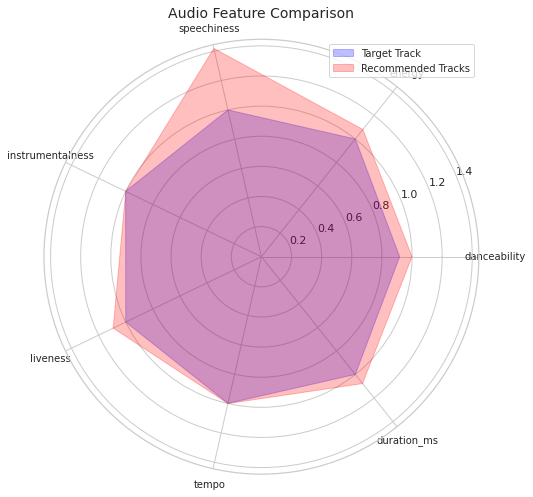

In [170]:
# Define audio features
audio_features = feature_columns

# Extract target features and average recommended features
target_features = df_clustered.loc[target_track_index, audio_features].values
recommended_features = top_recommended_tracks[audio_features].mean().values

# Plot audio feature comparison
plot_audio_feature_comparison(
    target_features=target_features,
    recommended_features=recommended_features,
    audio_features=audio_features,
    title='Audio Feature Comparison'
)

In [171]:
target_track_index = 192370  # Replace with the index of your target track

top_recommended_tracks = find_similar_tracks_across_clusters(
    dataframe=df_clustered,
    target_track_index=target_track_index,
    feature_columns=feature_columns,
    cluster_column='cluster',
    top_n=10
)

# Display the recommended tracks
print(top_recommended_tracks)

                     artist_name                    track_name  track_id  \
19700   ASIAN KUNG-FU GENERATION             1.2.3.4.5.6. Baby     20669   
639906              The Proctors  The Proctors - Shooting Star    673375   
320986               Blood Bells                       Destroy    335499   
428168                  Deadbolt                       Cockeye    447820   
974817           The Silent Boys                 Dreaming Away   1027335   
165987               René LaVice                          Pipe    173443   
250539                   Megahit                 Alpha Mission    261993   
971572               Boogie Boys                            75   1023868   
601530                 In Flames                       Clayman    632131   
557726               The Strokes      Hawaii - Juicebox B-Side    585085   

        popularity  year          genre  danceability  energy  key  mode  ...  \
19700        -0.08  2012            emo         -0.65    0.70    4     1  ...   
6

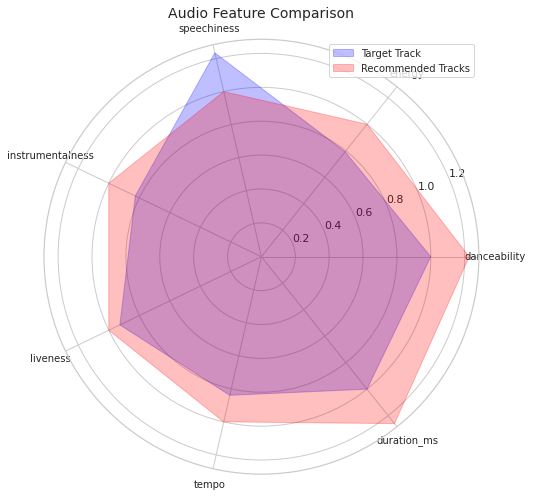

In [172]:
# Define audio features
audio_features = feature_columns

# Extract target features and average recommended features
target_features = df_clustered.loc[target_track_index, audio_features].values
recommended_features = top_recommended_tracks[audio_features].mean().values

# Plot audio feature comparison
plot_audio_feature_comparison(
    target_features=target_features,
    recommended_features=recommended_features,
    audio_features=audio_features,
    title='Audio Feature Comparison'
)

In [175]:
target_track_index = 293477  # Replace with the index of your target track

top_recommended_tracks = find_similar_tracks_across_clusters(
    dataframe=df_clustered,
    target_track_index=target_track_index,
    feature_columns=feature_columns,
    cluster_column='cluster',
    top_n=10
)

# Display the recommended tracks
print(top_recommended_tracks)

                     artist_name  \
604483      Thievery Corporation   
293379                      NOWË   
604693      Thievery Corporation   
59196          Felix Da Housecat   
530962                   Survive   
211409                Birocratic   
514726                Phil Gonzo   
424689              Cissy Street   
337345  Unknown Mortal Orchestra   
23539              Zombie Nation   

                                               track_name  track_id  \
604483                                     Focus On Sight    635270   
293379                                            Horizon    306665   
604693                   Focus On Sight - Remastered 2022    635497   
59196   I Just Want to Be a Lesbian - Riton Alternativ...     61856   
530962                                             Dreams    556401   
211409                                    Look Both Ways!    220925   
514726                                         Bloodsport    539315   
424689                             

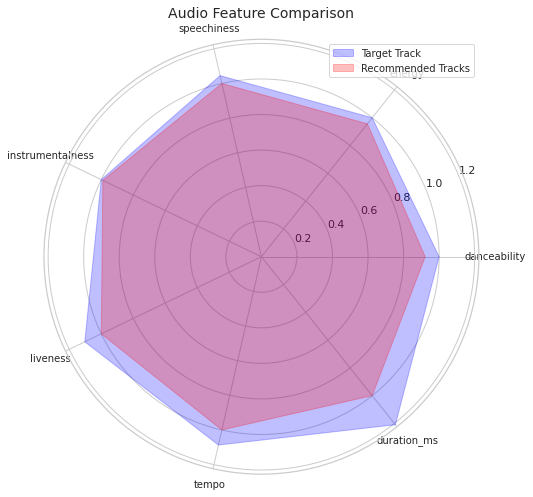

In [176]:
# Define audio features
audio_features = feature_columns

# Extract target features and average recommended features
target_features = df_clustered.loc[target_track_index, audio_features].values
recommended_features = top_recommended_tracks[audio_features].mean().values

# Plot audio feature comparison
plot_audio_feature_comparison(
    target_features=target_features,
    recommended_features=recommended_features,
    audio_features=audio_features,
    title='Audio Feature Comparison'
)

In [184]:
target_track_index = 40355  # Replace with the index of your target track

top_recommended_tracks = find_similar_tracks_across_clusters(
    dataframe=df_clustered,
    target_track_index=target_track_index,
    feature_columns=feature_columns,
    cluster_column='cluster',
    top_n=10
)

# Display the recommended tracks
print(top_recommended_tracks)

                     artist_name  \
970793                Svarttjern   
480669                 Sepultura   
270614              Hail The Sun   
1081694         Lower Definition   
863575             Parkway Drive   
970970                Svarttjern   
1037102  A Bullet for Pretty Boy   
176607                  Soilwork   
859129          Corrosive Sweden   
984327        Taking Back Sunday   

                                                track_name  track_id  \
970793                          Ancient Shadows Revelation   1022993   
480669                                        Hatred Aside    503130   
270614                                               Spite    282783   
1081694                                              Drugs   1138785   
863575                                             Pandora    910433   
970970                                          Code Human   1023197   
1037102                                           Patterns   1092325   
176607                     

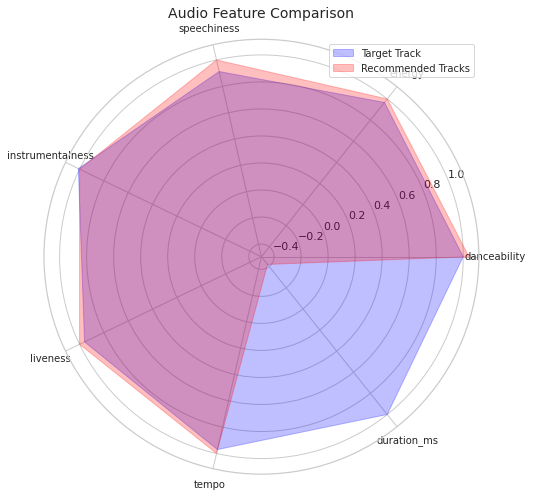

In [185]:
# Define audio features
audio_features = feature_columns

# Extract target features and average recommended features
target_features = df_clustered.loc[target_track_index, audio_features].values
recommended_features = top_recommended_tracks[audio_features].mean().values

# Plot audio feature comparison
plot_audio_feature_comparison(
    target_features=target_features,
    recommended_features=recommended_features,
    audio_features=audio_features,
    title='Audio Feature Comparison'
)

In [189]:
target_track_index = 85783  # Replace with the index of your target track

top_recommended_tracks = find_similar_tracks_across_clusters(
    dataframe=df_clustered,
    target_track_index=target_track_index,
    feature_columns=feature_columns,
    cluster_column='cluster',
    top_n=10
)

# Display the recommended tracks
print(top_recommended_tracks)

              artist_name                      track_name  track_id  \
84954          Moon Hooch                       Number 10     88705   
393223   Дмитрий Харатьян                  Школьный вальс    411252   
910911        Alicia Keys                  Wreckless Love    960358   
18851              Bonobo        Eyesdown - ARP 101 Remix     19805   
1066879           Popcaan                          So Bad   1123444   
346145      Emily Brimlow                 Calling Me Home    361928   
760718            Beyoncé  Naughty Girl (feat. Lil' Flip)    801863   
747128    Carlinhos Brown                     Cumbiamoura    787367   
274384          Bleachers         Everybody Lost Somebody    286756   
314846          916frosty                  birthday party    329130   

         popularity  year       genre  danceability  energy  key  mode  ...  \
84954          0.31  2013        jazz         -0.31   -0.18    1     1  ...   
393223        -1.10  2019     romance         -0.44   -0.46 

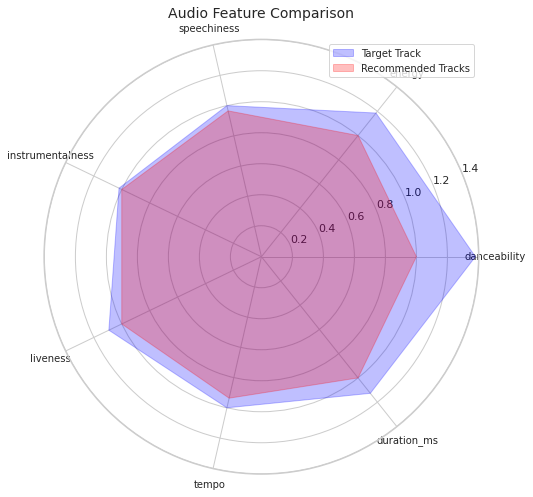

In [190]:
# Define audio features
audio_features = feature_columns

# Extract target features and average recommended features
target_features = df_clustered.loc[target_track_index, audio_features].values
recommended_features = top_recommended_tracks[audio_features].mean().values

# Plot audio feature comparison
plot_audio_feature_comparison(
    target_features=target_features,
    recommended_features=recommended_features,
    audio_features=audio_features,
    title='Audio Feature Comparison'
)

### Getting recommendations based on Popularity

In [162]:
def get_top_popular_tracks_by_genre(dataframe, genre_column='genre', popularity_column='popularity', track_name_column='track_name', artist_name_column='artist_name'):
    # Group by genre and find the track with the highest popularity
    top_popular_genre = (
        dataframe.groupby(genre_column)
        .apply(lambda x: x.sort_values(by=popularity_column, ascending=False).head(1))
        .reset_index(drop=True)
    )
    
    # Return relevant columns
    return top_popular_genre[[track_name_column, artist_name_column, genre_column, popularity_column]]


In [163]:
# Get the top popular track by genre
top_popular_genre = get_top_popular_tracks_by_genre(
    dataframe=df,
    genre_column='genre',
    popularity_column='popularity',
    track_name_column='track_name',
    artist_name_column='artist_name'
)

# Display the results
print("Top Popular Tracks by Genre:")
print(top_popular_genre)


Top Popular Tracks by Genre:
               track_name         artist_name        genre  popularity
0                 Hold On    Chord Overstreet     acoustic        3.90
1      La Vuelta Al Mundo            Calle 13     afrobeat        3.25
2           Hasta la Raíz  Natalia Lafourcade     alt-rock        3.83
3             State Lines           Novo Amor      ambient        3.45
4              Doomswitch    Make Them Suffer  black-metal        2.55
..                    ...                 ...          ...         ...
77                Har Dig               Yasin      swedish        3.32
78              El lloron      Trio Hugo Diaz        tango        1.40
79  Children - Radio Edit     Deborah de Luca       techno        3.00
80         Rave Superstar                 W&W       trance        2.81
81             oh my love           FKA twigs     trip-hop        2.42

[82 rows x 4 columns]


In [164]:
def get_top_popular_tracks_for_genre_and_year(dataframe, genre, year, popularity_column='popularity', track_name_column='track_name', artist_name_column='artist_name', top_n=10):
    # Filter DataFrame for the given genre and year
    filtered_df = dataframe[(dataframe['genre'] == genre) & (dataframe['year'] == year)]
    
    # Sort by popularity and select top N
    top_tracks = (
        filtered_df
        .sort_values(by=popularity_column, ascending=False)
        .head(top_n)
    )
    
    # Return relevant columns
    return top_tracks[[track_name_column, artist_name_column, popularity_column]]


In [165]:
# Define parameters
genre = 'black-metal'  # Replace with the desired genre
year = 2022  # Replace with the desired year

# Get the top popular tracks
top_popular_genre_year = get_top_popular_tracks_for_genre_and_year(
    dataframe=df,
    genre=genre,
    year=year,
    popularity_column='popularity',
    track_name_column='track_name',
    artist_name_column='artist_name',
    top_n=10
)

# Display the results
print(f"Top 10 Popular Tracks in {genre} Genre for {year}:")
print(top_popular_genre_year)


Top 10 Popular Tracks in black-metal Genre for 2022:
                      track_name       artist_name  popularity
533749                Doomswitch  Make Them Suffer        2.55
533750                   Gutless        Angelmaker        1.97
533751                 Slaughter        Angelmaker        1.65
533753             In Dying Days        Angelmaker        1.59
533752  An Offering to the Night       Jesus Piece        1.52
533755         The Deathless Sun          Behemoth        1.52
533756  Caravan of Broken Ghosts        Darkthrone        1.33
533759     Ov My Herculean Exile          Behemoth        1.33
533760          Post-God Nirvana          Behemoth        1.27
533768             Holy Mountain    Rotting Christ        1.20
